# Setup

In [53]:
import sqlite3
import pandas as pd
import importlib
import typedstream as ts
import re
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import plotly as ply
import re
from src.dopetracks_summary import utility_functions as uf
# from src.data_prep import data_cleaning as dc
from src.dopetracks_summary import create_spotify_playlist
import numpy as np

db_path = "/Users/nmarks/Library/Messages/chat.db"  # Adjust path as needed
conn = sqlite3.connect(db_path)

importlib.reload(create_spotify_playlist)
importlib.reload(uf)

<module 'src.utility_functions' from '/Users/nmarks/root_code_repo/dopetracks_summary/src/utility_functions.py'>

# 1 Pull + clean data

In [28]:
data = prepare_data.pull_and_clean_messages()

2024-12-25 02:04:54 - INFO - 
    ----------------------------------------------------------
    [1] Pulling and cleaning iMessage data
    ----------------------------------------------------------
    
2024-12-25 02:04:54 - INFO - Connecting to the database...
2024-12-25 02:04:54 - INFO - Database connection established. Time taken: 0.00s
2024-12-25 02:04:54 - INFO - Pulling data...


Database connection established.


2024-12-25 02:05:02 - INFO - Data successfully pulled! Time taken: 7.89s
2024-12-25 02:05:02 - INFO - Cleaning data...
2024-12-25 02:05:04 - INFO - Data successfully cleaned! Time taken: 2.03s
2024-12-25 02:05:04 - INFO - Parsing AttributedBody...
2024-12-25 02:05:39 - INFO - Done parsing AttributedBody! Time taken: 34.88s
2024-12-25 02:05:39 - INFO - Extracting Spotify and other links...
2024-12-25 02:05:41 - INFO - Spotify and other links extracted! Time taken: 2.69s
2024-12-25 02:05:41 - INFO - Database connection closed.


# 2. Extract spotify links

In [29]:
dopetracks_data = data['messages'][(data['messages']['chat_name'] == 'Dope tracks (🔥🎧)')]

In [39]:
messages_db_path = os.path.expanduser("~/Library/Messages/chat.db")
print(messages_db_path)

/Users/nmarks/Library/Messages/chat.db


In [33]:
all_links = pd.concat([dopetracks_data['spotify_song_links'], 
                        dopetracks_data['spotify_album_links'], 
                        dopetracks_data['spotify_playlist_links'], 
                        dopetracks_data['spotify_other_links']], ignore_index=True).dropna()



0                                                   []
1                                                   []
2    [https://open.spotify.com/track/0s7MuB2jO2wukz...
3    [https://open.spotify.com/track/3GPeN4bDQfVN7t...
4                                                   []
dtype: object

In [259]:

# Provide inputs for Spotify authentication and playlist creation
CLIENT_ID=os.getenv('SPOTIFY_CLIENT_ID')
CLIENT_SECRET=os.getenv('SPOTIFY_CLIENT_SECRET')
REDIRECT_URI=os.getenv('SPOTIFY_REDIRECT_URI')
SCOPE = "playlist-modify-public playlist-modify-private"
PLAYLIST_NAME = 'Dopetracks Generated Playlist'


create_spotify_playlist.create_spotify_playlist(CLIENT_ID, CLIENT_SECRET, REDIRECT_URI, SCOPE, PLAYLIST_NAME)

Playlist 'Dopetracks Generated Playlist' already exists with ID: 0awXi9WIjnb11QxcdWwZkG


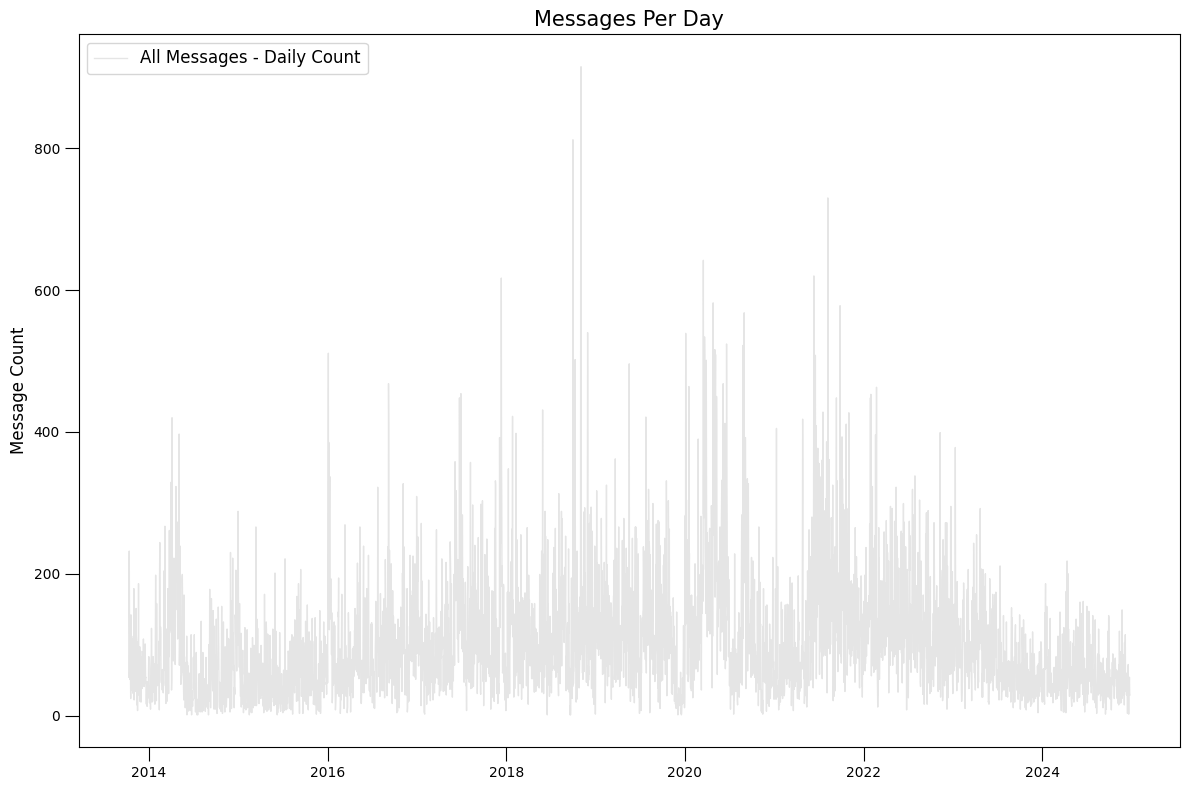

In [ ]:
# Messages per day
import plotly.tools as tls
import plotly.io as pio

plt.figure(figsize=(12,8))

plt.title("Messages Per Day", fontsize=15)

daily_count = messages.groupby('date').size()
daily_count_received = messages.loc[messages['is_service_message']==0].groupby('date').size()

# plot
plt.plot(daily_count, color='grey',lw=1, alpha=0.2, label='All Messages - Daily Count')

plt.legend(loc='upper left', fontsize='large')
plt.ylabel('Message Count', fontsize=12)
plt.tick_params(size=10)
plt.tight_layout()



# Appendix

In [30]:
columns_to_keep = [col for col in data['messages'].columns if re.search('link|final_text|reaction_type|chat_id|chat_name|^contact_info', col)]

with pd.option_context('display.max_colwidth', None, 'display.max_columns', None):
    uf.display_scrollable(
        data['messages'][
            (data['messages']['reaction_type'] == 'no-reaction') &
            (data['messages']['chat_name'] == 'Dope tracks (🔥🎧)') &
            (data['messages']['final_text'].str.contains('Spotify', case=False, na=False))][columns_to_keep].head(2000)
    )

AttributeError: 'Series' object has no attribute 'to_html'

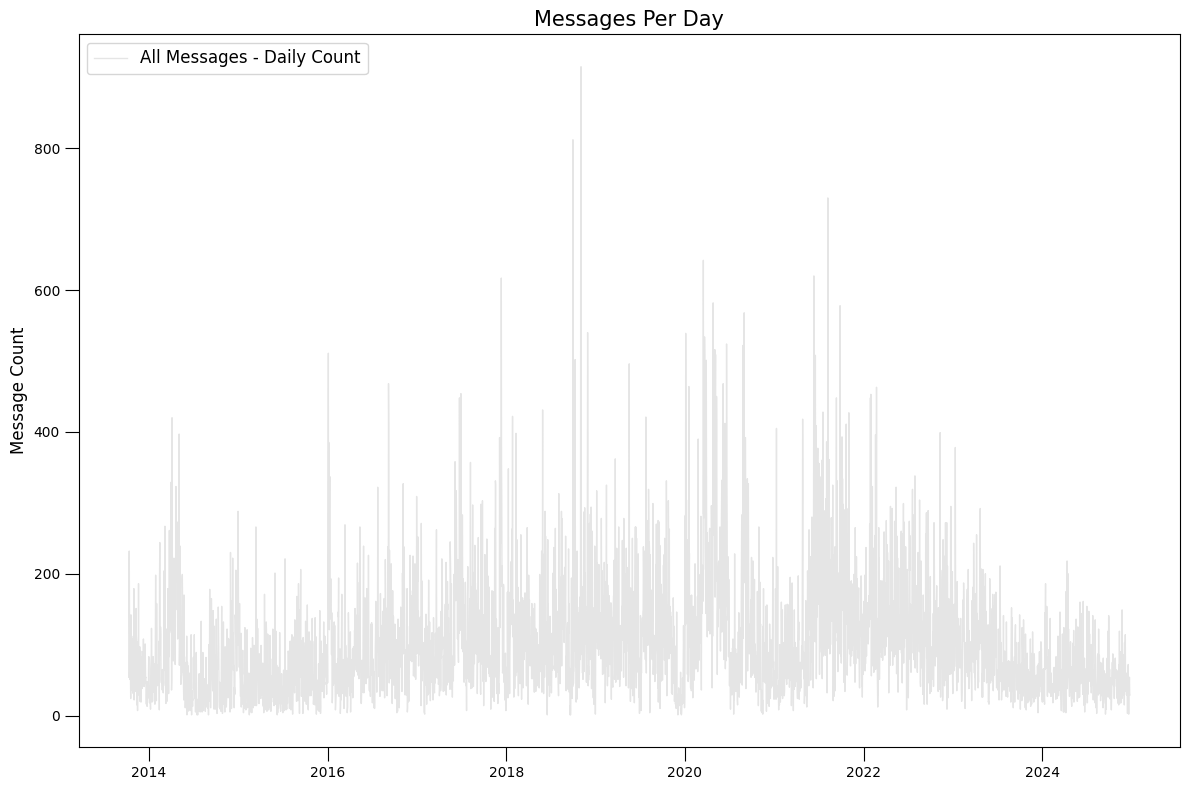

In [227]:
# Messages per day
import plotly.tools as tls
import plotly.io as pio

plt.figure(figsize=(12,8))

plt.title("Messages Per Day", fontsize=15)

daily_count = messages.groupby('date').size()
daily_count_received = messages.loc[messages['is_service_message']==0].groupby('date').size()

# plot
plt.plot(daily_count, color='grey',lw=1, alpha=0.2, label='All Messages - Daily Count')

plt.legend(loc='upper left', fontsize='large')
plt.ylabel('Message Count', fontsize=12)
plt.tick_params(size=10)
plt.tight_layout()

